# Importing Library

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [166]:
Id = '1BWrPEEkOCcBaLG65cuF9FklrGcLJ94AqzLQ_TYPxqNc'
Name = 'SampleSuperstore'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(Id,Name)
df = pd.read_csv(URL)

In [167]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Operation to removal Unnecessary data

In [168]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [169]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [170]:
df.duplicated().sum()

17

In [171]:
df.drop_duplicates(inplace = True)

In [172]:
for i in df.columns:
    print(i,':',len(df[i].unique()))

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [173]:
df.drop(columns=['Country', 'Postal Code'], inplace = True)

# Data Visualisation

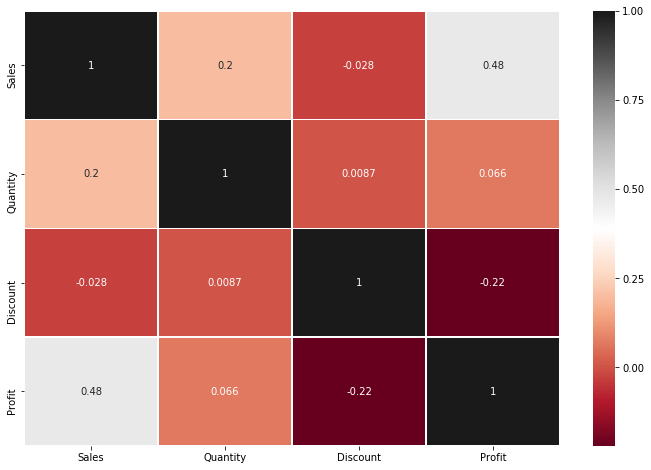

In [174]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5, cmap='RdGy')

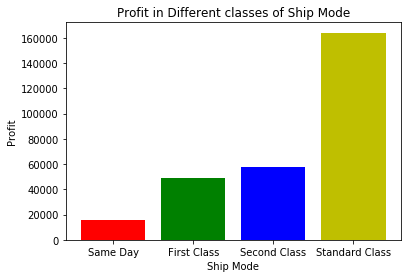

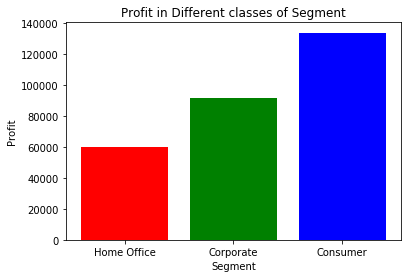

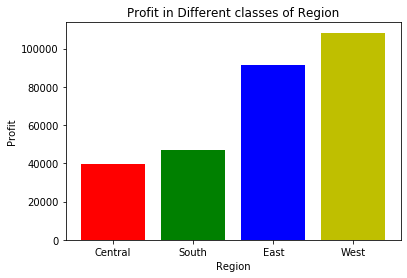

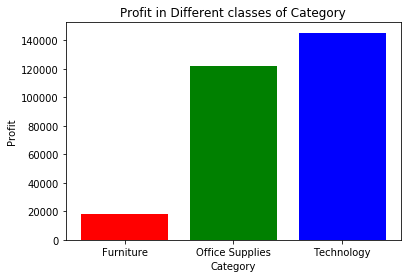

In [188]:
explore_col = ['Ship Mode', 'Segment', 'Region', 'Category'] 
for i in explore_col:
    un_sor=df.groupby(i)['Profit'].sum().sort_values()
    plt.figure()
    plt.bar(un_sor.index,un_sor.values,color='rgbymc')
    plt.ylabel('Profit')
    plt.xlabel(i)
    plt.title('Profit in Different classes of {}'.format(i))

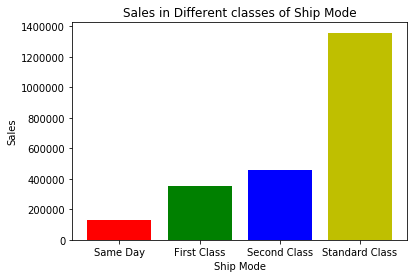

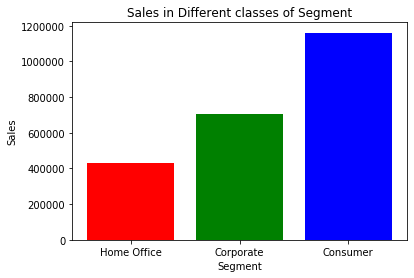

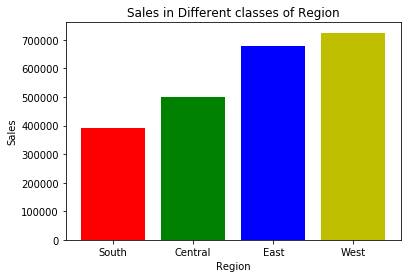

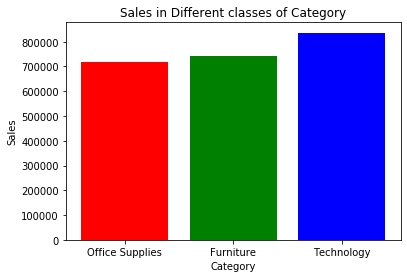

In [176]:
for i in explore_col:
    un_sor=df.groupby(i)['Sales'].sum().sort_values()
    plt.figure()
    plt.bar(un_sor.index,un_sor.values,color='rgbymc')
    plt.ylabel('Sales')
    plt.xlabel(i)
    plt.title('Sales in Different classes of {}'.format(i))

### Observations -

After Visualizing we got that, 

The customers give the highest priority to Standard Class.

In Segment, the consumers do most of the shipping.

From the Regions graph, we observe that the West region has the highest customers.

From the items category, we observe that the Office Supplies Category has the highest sales count.

Text(0, 0.5, 'Frequency')

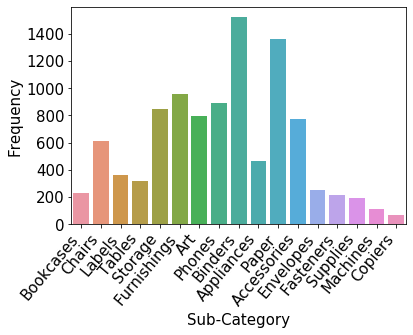

In [177]:
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=50, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Profit')

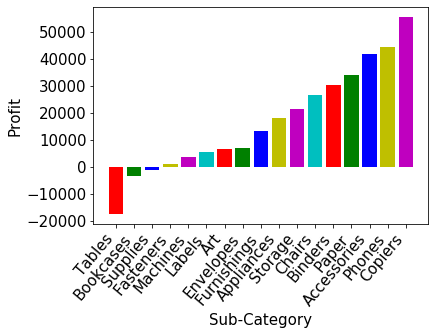

In [178]:
sub = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.bar(sub.index,sub.values,color='rgbymc')
plt.xticks(rotation = 50, ha ='right', fontsize =15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Profit', fontsize=15)

### Observations -

From the above graph, we observe that some of the top most profitable selling products are Copiers, Phones, Accessories.

Text(0.5, 1.0, 'State Vs Sales')

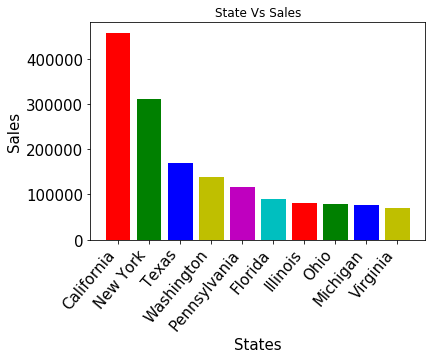

In [179]:
un_sor=df.groupby('State')['Sales'].sum().sort_values(ascending = False)[:10]
plt.figure()
plt.bar(un_sor.index,un_sor.values,color='rgbymc')
plt.xticks(fontsize =15, rotation = 50, ha ='right')
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('State Vs Sales')

Text(0.5, 1.0, 'State Vs Profit')

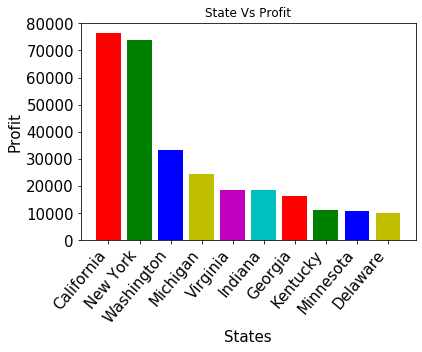

In [180]:
un_sor=df.groupby('State')['Profit'].sum().sort_values(ascending = False)[:10]
plt.figure()
plt.bar(un_sor.index,un_sor.values,color='rgbymc')
plt.xticks(fontsize =15, rotation = 50, ha ='right')
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('State Vs Profit')

### Observations -

We observe that the top-selling states are California, New York and Texas.

And most profitable states are California, New York and Washington.

We can also see there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which they were not able to come in top 10 most profitable states even tho they are among top 10 states with most sales.

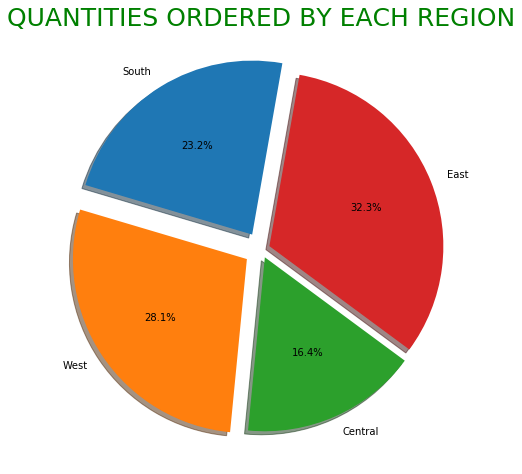

In [181]:
region = df.groupby('Region')['Quantity'].sum().reset_index()
labels = df['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('QUANTITIES ORDERED BY EACH REGION',size=25,color = 'green')
plt.show()

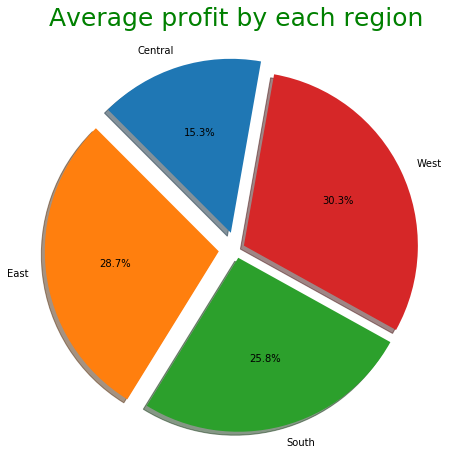

In [182]:
region = df.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize=(10,8))
plt.pie(region['Profit'],autopct='%1.1f%%',labels=region['Region'].unique(),explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('Average profit by each region',size=25,color = 'green')
plt.show()

Text(0.5, 1.0, 'State Vs Profit')

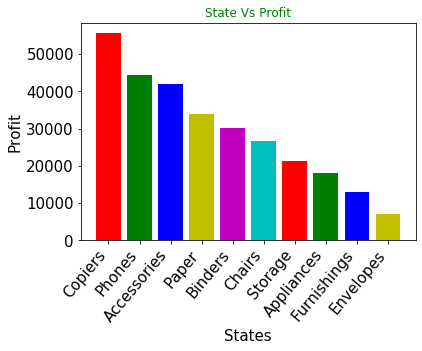

In [183]:
items = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)[:10]
plt.figure()
plt.bar(items.index,items.values,color='rgbymc')
plt.title('TOP 10 PROFITABLE PRODUCTS',size=25,color = 'Green')
plt.xticks(fontsize =15, rotation = 50, ha ='right')
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('State Vs Profit')

### we can improve -
Since the least profitable sub-category is Tables, Bookcases and Supplies sales team should look at the factors which are harming their profit and should find ways to boost profit.

Since most of the shipping modes preferred are of Standard Class and the least preferred are Same Day & First Class modes, we should dip down their prices to show customers how convenient they are.

The advertisement should be done in the south region to generate awareness about the company.

We can also see there is a negative factor in the states like Texas, Pennsylvania, Florida etc. by which they were not able to come in top 10 most profitable states even tho they are among top 10 states with most sales.

Furniture category is showing least profit, so strategies like bringing new, branded and quality product in this category should be encouraged in the company.